In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WineQT.csv')
df.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
50,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.2,4,73
622,8.4,0.310,0.29,3.1,0.194,14.0,26.0,0.99536,3.22,0.78,12.0,6,882
1022,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6,1434


# Different Approch
```
1. Min-Max
2. Mean-Normalization
3. Max-Absoulate
4. Robust Scaling
```

# Filter Data

In [3]:
col_list = ['density', 'pH', 'alcohol']

In [4]:
new_df = df[col_list]
new_df.sample(3)

,density,pH,alcohol
903,0.99688,3.24,9.5
299,0.99880,3.26,10.6
647,0.99395,3.62,11.0


In [5]:
new_df.describe()

,density,pH,alcohol
count,1143.000000,1143.000000,1143.000000
mean,0.996730,3.311015,10.442111
std,0.001925,0.156664,1.082196
min,0.990070,2.740000,8.400000
25%,0.995570,3.205000,9.500000
50%,0.996680,3.310000,10.200000
75%,0.997845,3.400000,11.100000
max,1.003690,4.010000,14.900000


In [25]:
alco_mean = new_df['alcohol'].mean()
alco_max = new_df['alcohol'].max()
alco_min = new_df['alcohol'].min()
alco_median = new_df['alcohol'].median()


pH_mean = new_df['pH'].mean()
pH_max = new_df['pH'].max()
pH_min = new_df['pH'].min()
pH_median = new_df['pH'].median()

density_mean = new_df['density'].mean()
density_max = new_df['density'].max()
density_min = new_df['density'].min()
density_median = new_df['density'].median()

# 1. Min Max

In [7]:
min_max = new_df.copy()
min_max['norm_alcohol'] = (new_df['alcohol'] - alco_min) / (alco_max - alco_min)
min_max['norm_pH'] = (new_df['pH'] - pH_min) / (pH_max - pH_min)
min_max['norm_density'] = (new_df['density'] - density_min) / (density_max - density_min)
min_max

,density,pH,alcohol,norm_alcohol,norm_pH,norm_density
0,0.99780,3.51,9.4,0.153846,0.606299,0.567548
1,0.99680,3.20,9.8,0.215385,0.362205,0.494126
2,0.99700,3.26,9.8,0.215385,0.409449,0.508811
3,0.99800,3.16,9.8,0.215385,0.330709,0.582232
4,0.99780,3.51,9.4,0.153846,0.606299,0.567548
...,...,...,...,...,...,...
1138,0.99574,3.42,11.0,0.400000,0.535433,0.416300
1139,0.99651,3.42,9.5,0.169231,0.535433,0.472834
1140,0.99490,3.45,10.5,0.323077,0.559055,0.354626
1141,0.99512,3.52,11.2,0.430769,0.614173,0.370778


In [8]:
min_max.describe()

,density,pH,alcohol,norm_alcohol,norm_pH,norm_density
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.996730,3.311015,10.442111,0.314171,0.449618,0.489017
std,0.001925,0.156664,1.082196,0.166492,0.123358,0.141341
min,0.990070,2.740000,8.400000,0.000000,0.000000,0.000000
25%,0.995570,3.205000,9.500000,0.169231,0.366142,0.403818
50%,0.996680,3.310000,10.200000,0.276923,0.448819,0.485316
75%,0.997845,3.400000,11.100000,0.415385,0.519685,0.570852
max,1.003690,4.010000,14.900000,1.000000,1.000000,1.000000


# 2. Mean Normalization

In [9]:
new_df = df[['density', 'pH', 'alcohol']]
mean_df = new_df.copy()

In [10]:
mean_df['norm_density'] = (mean_df['density'] - density_mean) / (density_max - density_min)
mean_df['norm_pH'] = (mean_df['pH'] - pH_mean) / (pH_max - pH_min)
mean_df['norm_alcohol'] = (mean_df['alcohol'] - alco_mean) / (alco_max - alco_min)
mean_df

,density,pH,alcohol,norm_density,norm_pH,norm_alcohol
0,0.99780,3.51,9.4,0.078531,0.156681,-0.160325
1,0.99680,3.20,9.8,0.005109,-0.087413,-0.098786
2,0.99700,3.26,9.8,0.019794,-0.040169,-0.098786
3,0.99800,3.16,9.8,0.093215,-0.118909,-0.098786
4,0.99780,3.51,9.4,0.078531,0.156681,-0.160325
...,...,...,...,...,...,...
1138,0.99574,3.42,11.0,-0.072717,0.085815,0.085829
1139,0.99651,3.42,9.5,-0.016183,0.085815,-0.144940
1140,0.99490,3.45,10.5,-0.134391,0.109437,0.008906
1141,0.99512,3.52,11.2,-0.118239,0.164555,0.116598


In [11]:
mean_df.describe()

,density,pH,alcohol,norm_density,norm_pH,norm_alcohol
count,1143.000000,1143.000000,1143.000000,1.143000e+03,1.143000e+03,1.143000e+03
mean,0.996730,3.311015,10.442111,8.174661e-15,-1.025718e-16,-2.020353e-16
std,0.001925,0.156664,1.082196,1.413412e-01,1.233575e-01,1.664916e-01
min,0.990070,2.740000,8.400000,-4.890170e-01,-4.496180e-01,-3.141710e-01
25%,0.995570,3.205000,9.500000,-8.519906e-02,-8.347628e-02,-1.449402e-01
50%,0.996680,3.310000,10.200000,-3.701263e-03,-7.991127e-04,-3.724791e-02
75%,0.997845,3.400000,11.100000,8.183471e-02,7.006703e-02,1.012136e-01
max,1.003690,4.010000,14.900000,5.109830e-01,5.503820e-01,6.858290e-01


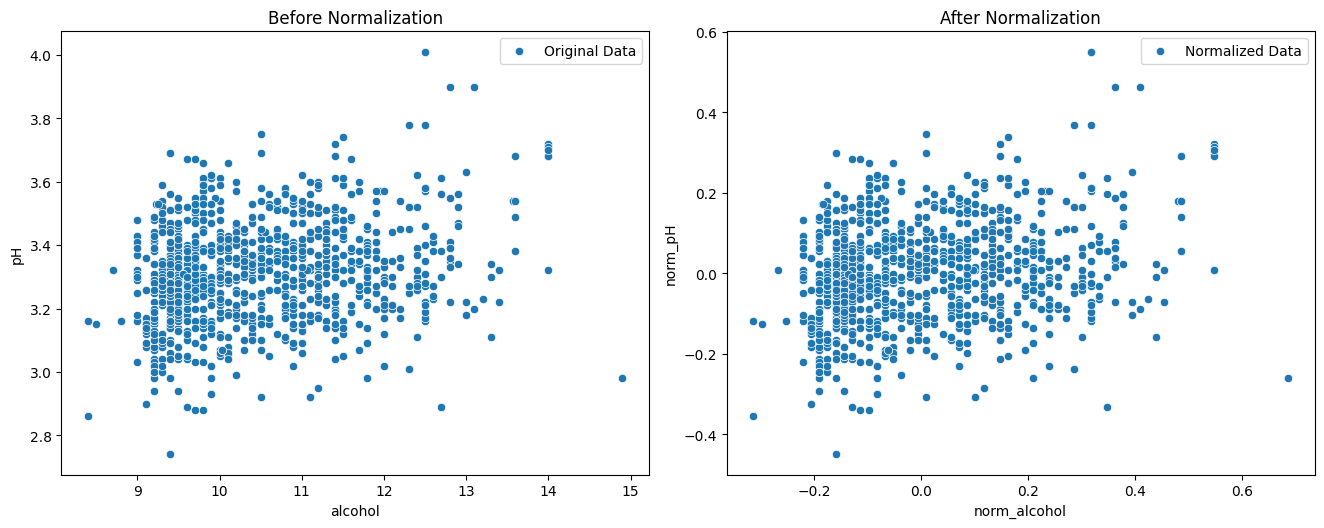

In [24]:
plt.figure(figsize=(20, 20))

plt.subplot(4, 3, 1)  # Create subplot in a 3x3 grid
sns.scatterplot(data=new_df, x='alcohol', y='pH', label='Original Data')
plt.title(f"Before Normalization")
plt.legend()

plt.subplot(4, 3, 2)
sns.scatterplot(data=mean_df, x='norm_alcohol', y='norm_pH', label='Normalized Data')
plt.title(f"After Normalization")
plt.legend()

plt.tight_layout()
plt.show()

# 3. Max-absolute

In [12]:
max_abs = new_df.copy()
max_abs['norm_alcohol'] = new_df['alcohol'] / abs(alco_max)
max_abs['norm_pH'] = new_df['pH'] / abs(pH_max)
max_abs['norm_density'] = new_df['density'] / abs(density_max)
max_abs

,density,pH,alcohol,norm_alcohol,norm_pH,norm_density
0,0.99780,3.51,9.4,0.630872,0.875312,0.994132
1,0.99680,3.20,9.8,0.657718,0.798005,0.993135
2,0.99700,3.26,9.8,0.657718,0.812968,0.993335
3,0.99800,3.16,9.8,0.657718,0.788030,0.994331
4,0.99780,3.51,9.4,0.630872,0.875312,0.994132
...,...,...,...,...,...,...
1138,0.99574,3.42,11.0,0.738255,0.852868,0.992079
1139,0.99651,3.42,9.5,0.637584,0.852868,0.992846
1140,0.99490,3.45,10.5,0.704698,0.860349,0.991242
1141,0.99512,3.52,11.2,0.751678,0.877805,0.991462


In [13]:
max_abs.describe()

,density,pH,alcohol,norm_alcohol,norm_pH,norm_density
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.996730,3.311015,10.442111,0.700813,0.825689,0.993066
std,0.001925,0.156664,1.082196,0.072631,0.039068,0.001918
min,0.990070,2.740000,8.400000,0.563758,0.683292,0.986430
25%,0.995570,3.205000,9.500000,0.637584,0.799252,0.991910
50%,0.996680,3.310000,10.200000,0.684564,0.825436,0.993016
75%,0.997845,3.400000,11.100000,0.744966,0.847880,0.994176
max,1.003690,4.010000,14.900000,1.000000,1.000000,1.000000


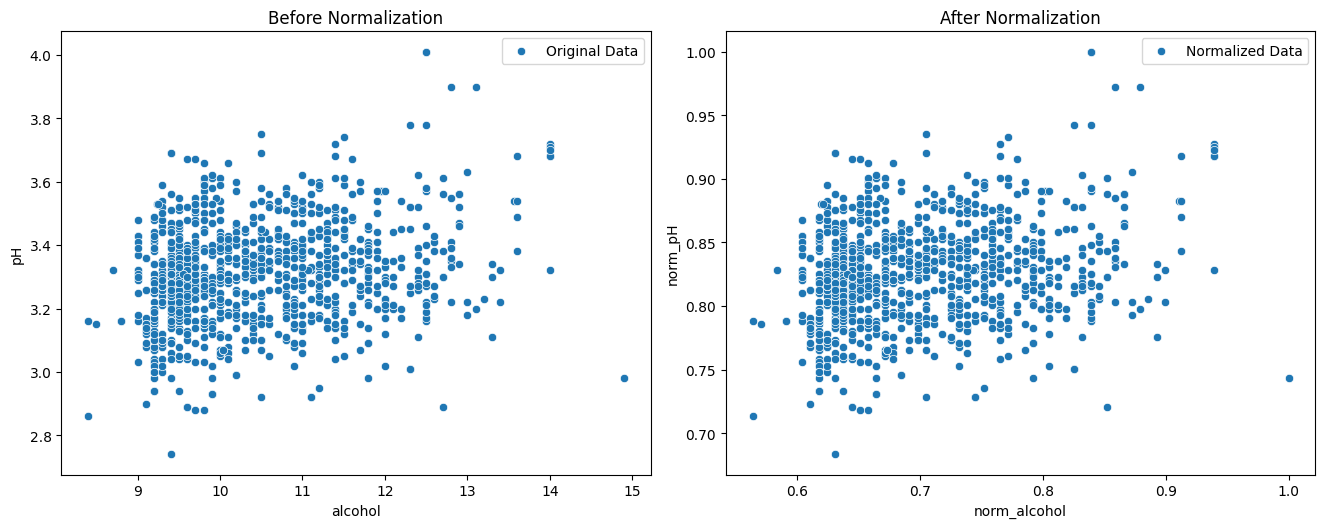

In [23]:
plt.figure(figsize=(20, 20))

plt.subplot(4, 3, 1)  # Create subplot in a 3x3 grid
sns.scatterplot(data=new_df, x='alcohol', y='pH', label='Original Data')
plt.title(f"Before Normalization")
plt.legend()

plt.subplot(4, 3, 2)
sns.scatterplot(data=max_abs, x='norm_alcohol', y='norm_pH', label='Normalized Data')
plt.title(f"After Normalization")
plt.legend()

plt.tight_layout()
plt.show()

# 4. Robust Scaling

## IQR find
```
IQR = Q3-Q1
```

In [28]:
roboust_scal = new_df.copy()
roboust_scal.quantile([0.25, 0.75])

,density,pH,alcohol
0.25,0.995570,3.205,9.5
0.75,0.997845,3.400,11.1


In [30]:
iqr_density = roboust_scal['density'].quantile(0.75) - roboust_scal['density'].quantile(0.25)
iqr_pH = roboust_scal['pH'].quantile(0.75) - roboust_scal['pH'].quantile(0.25)
iqr_alcohol = roboust_scal['alcohol'].quantile(0.75) - roboust_scal['alcohol'].quantile(0.25)

## Calculate

In [31]:
roboust_scal['norm_density'] = (roboust_scal['density'] - roboust_scal['density'].quantile(0.5)) / iqr_density
roboust_scal['norm_alcohol'] = (roboust_scal['alcohol'] - roboust_scal['alcohol'].quantile(0.5)) / iqr_alcohol
roboust_scal['norm_pH'] = (roboust_scal['pH'] - roboust_scal['pH'].quantile(0.5)) / iqr_pH
roboust_scal

,density,pH,alcohol,norm_density,norm_alcohol,norm_pH
0,0.99780,3.51,9.4,0.492308,-0.5000,1.025641
1,0.99680,3.20,9.8,0.052747,-0.2500,-0.564103
2,0.99700,3.26,9.8,0.140659,-0.2500,-0.256410
3,0.99800,3.16,9.8,0.580220,-0.2500,-0.769231
4,0.99780,3.51,9.4,0.492308,-0.5000,1.025641
...,...,...,...,...,...,...
1138,0.99574,3.42,11.0,-0.413187,0.5000,0.564103
1139,0.99651,3.42,9.5,-0.074725,-0.4375,0.564103
1140,0.99490,3.45,10.5,-0.782418,0.1875,0.717949
1141,0.99512,3.52,11.2,-0.685714,0.6250,1.076923


In [32]:
roboust_scal.describe()

,density,pH,alcohol,norm_density,norm_alcohol,norm_pH
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.996730,3.311015,10.442111,0.022159,0.151320,0.005204
std,0.001925,0.156664,1.082196,0.846183,0.676372,0.803405
min,0.990070,2.740000,8.400000,-2.905495,-1.125000,-2.923077
25%,0.995570,3.205000,9.500000,-0.487912,-0.437500,-0.538462
50%,0.996680,3.310000,10.200000,0.000000,0.000000,0.000000
75%,0.997845,3.400000,11.100000,0.512088,0.562500,0.461538
max,1.003690,4.010000,14.900000,3.081319,2.937500,3.589744


# Compare these graphs

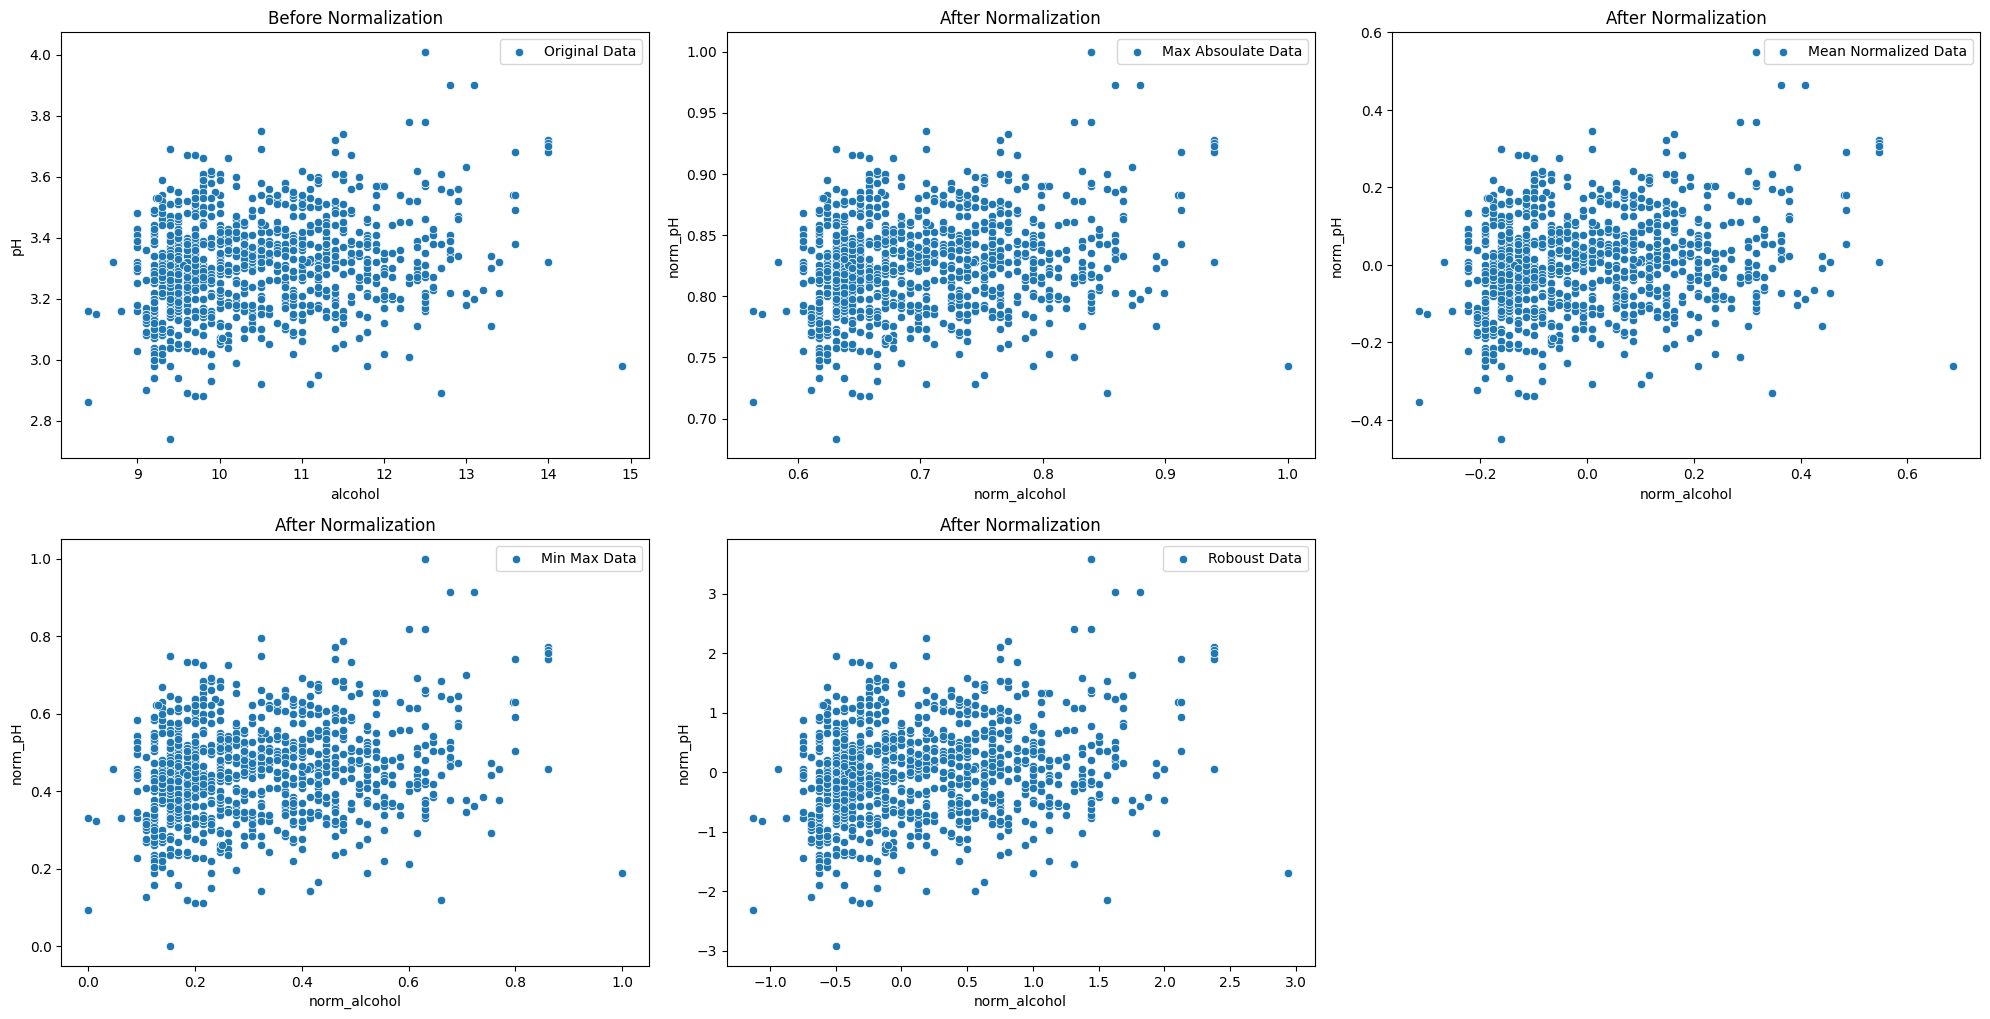

In [34]:
plt.figure(figsize=(20, 20))

plt.subplot(4, 3, 1)  # Create subplot in a 3x3 grid
sns.scatterplot(data=new_df, x='alcohol', y='pH', label='Original Data')
plt.title(f"Before Normalization")
plt.legend()

plt.subplot(4, 3, 2)
sns.scatterplot(data=max_abs, x='norm_alcohol', y='norm_pH', label='Max Absoulate Data')
plt.title(f"After Normalization")
plt.legend()

plt.subplot(4, 3, 3)
sns.scatterplot(data=mean_df, x='norm_alcohol', y='norm_pH', label='Mean Normalized Data')
plt.title(f"After Normalization")
plt.legend()

plt.subplot(4, 3, 4)
sns.scatterplot(data=min_max, x='norm_alcohol', y='norm_pH', label='Min Max Data')
plt.title(f"After Normalization")
plt.legend()

plt.subplot(4, 3, 5)
sns.scatterplot(data=roboust_scal, x='norm_alcohol', y='norm_pH', label='Roboust Data')
plt.title(f"After Normalization")
plt.legend()

plt.tight_layout()
plt.show()